In [134]:
%load_ext autoreload
%autoreload 2

import sys
import os

project_path = os.getcwd().split("/CAP_tools/notebooks")[0]
sys.path.insert(1, project_path)
import CAP_tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Paths

In [120]:
sher_cap_dscalar_path = "/data/data4/earlycort_7114/analyses/dynamics_gbu_sher/sher/dscalars_gradientOrder/CAP_states_sher_k12_cosine_km++_centroid_rep100_winsorized_gradientOrder_250311.dscalar.nii"
gbu_cap_dscalar_path = "/data/data4/earlycort_7114/analyses/dynamics_gbu_sher/gbu/dscalars_gradientOrder/CAP_states_gbu_k8_cosine_km++_centroid_rep100_winsorized_gradientOrder_250311.dscalar.nii"

# hcp_cap_state_dir = "/data/data7/network_control/results/HCP_7T_analysis/CAP_states/tfMRI_MOVIE_7T_DAY_1"
# hcp_cap_dscalar_path = f"{hcp_cap_state_dir}/tfMRI_MOVIE_7T_DAY_1_CAP_states_K9_cos.dscalar.nii"

# hcp_cap_state_dir = "/data/data7/network_control/results/HCP_7T_analysis/CAP_states/tfMRI_MOVIE_7T_DAY_1_ISC_15"
# hcp_cap_dscalar_path = f"{hcp_cap_state_dir}/tfMRI_MOVIE_7T_DAY_1_ISC_15_CAP_states_K10_cos.dscalar.nii"

hcp_cap_state_dir = "/data/data7/network_control/results/HCP_7T_analysis/CAP_states/tfMRI_MOVIE_7T_COMBINED_ISC_15"
hcp_cap_dscalar_path = f"{hcp_cap_state_dir}/tfMRI_MOVIE_7T_COMBINED_ISC_15_CAP_states_K11_cos.dscalar.nii"

hcp_cap_state_dir = "/data/data7/network_control/results/HCP_7T_analysis/CAP_states/tfMRI_MOVIE_7T_COMBINED_TASIT_topo"
hcp_cap_dscalar_path = f"{hcp_cap_state_dir}/tfMRI_MOVIE_7T_COMBINED_TASIT_topo_CAP_states_K12_cos.dscalar.nii"

# Compare HCP and GBU

In [127]:
n_perm = 1000

In [128]:
GBU_compare_r, GBU_compare_p = CAP_tools.compare.compare_caps(gbu_cap_dscalar_path, hcp_cap_dscalar_path,
                                                      n_perm=n_perm, n_workers=8)

vox offset (=773320) not divisible by 16, not SPM compatible; leaving at current value
vox offset (=773320) not divisible by 16, not SPM compatible; leaving at current value
/Users/cole/miniconda3/envs/nct/lib/python3.11/site-packages/nibabel/nifti1.py:774: UserWarning: Extension size is not a multiple of 16 bytes; Assuming size is correct and hoping for the best
  warnings.warn(
vox offset (=773320) not divisible by 16, not SPM compatible; leaving at current value


Comparing CAPs:   0%|          | 0/8 [00:00<?, ?it/s]

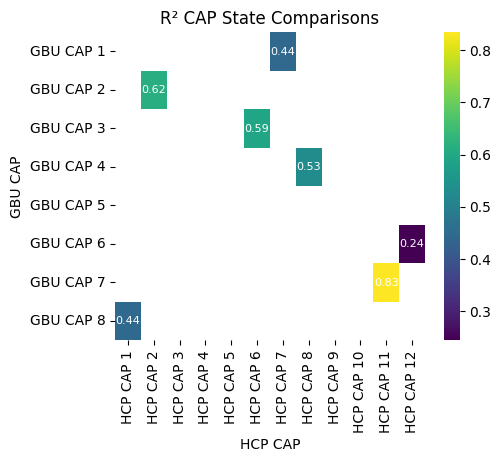

In [143]:
# CAP_tools.compare.compare_CAP_heatmap(GBU_compare_r, GBU_compare_p, "GBU", "HCP", only_max=False)
CAP_tools.compare.compare_CAP_heatmap(GBU_compare_r, GBU_compare_p, "GBU", "HCP", only_max="1-max")

# Compare HCP and Sherlock

In [130]:
sher_compare_r, sher_compare_p = CAP_tools.compare.compare_caps(sher_cap_dscalar_path,
                                                                hcp_cap_dscalar_path,
                                                                n_perm=n_perm, n_workers=8)

Comparing CAPs:   0%|          | 0/12 [00:00<?, ?it/s]

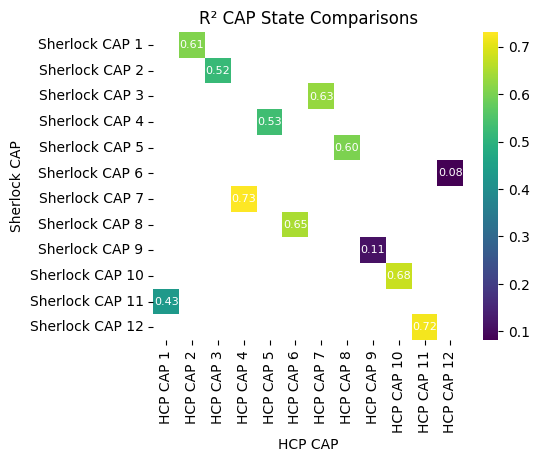

In [139]:
CAP_tools.compare.compare_CAP_heatmap(sher_compare_r, sher_compare_p, "Sherlock", "HCP", only_max="1-max")
# CAP_tools.compare.compare_CAP_heatmap(sher_compare_r, sher_compare_p, "Sherlock", "HCP", only_max=False)

# Compare HCP day 1 and day 2

In [111]:
hcp_day_1_TASIT_state_dir = "/data/data7/network_control/results/HCP_7T_analysis/CAP_states/tfMRI_MOVIE_7T_DAY_1_TASIT_topo/"
hcp_day_1_TASIT_dscalar_path = f"{hcp_day_1_TASIT_state_dir}/tfMRI_MOVIE_7T_DAY_1_TASIT_topo_CAP_states_K20_cos.dscalar.nii"
# hcp_day_1_TASIT_dscalar_path = f"{hcp_day_1_TASIT_state_dir}/tfMRI_MOVIE_7T_DAY_1_TASIT_topo_CAP_states_K13_cos.dscalar.nii"

hcp_day_2_TASIT_state_dir = "/data/data7/network_control/results/HCP_7T_analysis/CAP_states/tfMRI_MOVIE_7T_DAY_2_TASIT_topo"
hcp_day_2_TASIT_dscalar_path = f"{hcp_day_2_TASIT_state_dir}/tfMRI_MOVIE_7T_DAY_2_TASIT_topo_CAP_states_K20_cos.dscalar.nii"
# hcp_day_2_TASIT_dscalar_path = f"{hcp_day_2_TASIT_state_dir}/tfMRI_MOVIE_7T_DAY_2_TASIT_topo_CAP_states_K9_cos.dscalar.nii"

In [114]:
hcp_day_compare_r, hcp_day_compare_p = CAP_tools.compare.compare_caps(hcp_day_1_TASIT_dscalar_path,
                                                                hcp_day_2_TASIT_dscalar_path,
                                                                n_perm=100, n_workers=8)

Comparing CAPs:   0%|          | 0/20 [00:00<?, ?it/s]

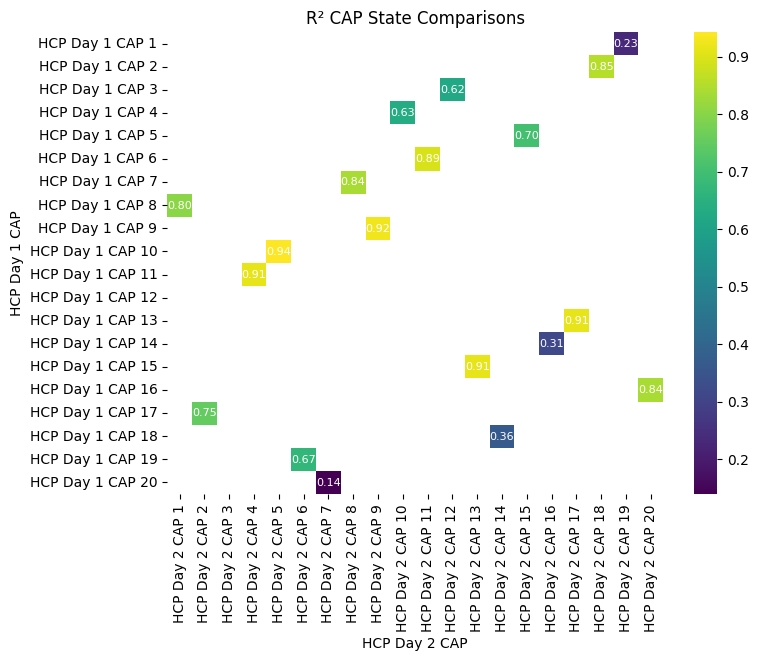

In [161]:
z = CAP_tools.compare.compare_CAP_heatmap(hcp_day_compare_r, hcp_day_compare_p, "HCP Day 1", "HCP Day 2",
                                      only_max="1-max", figsize=(8, 6))
# CAP_tools.compare.compare_CAP_heatmap(hcp_day_compare_r, hcp_day_compare_p, "HCP Day 1", "HCP Day 2",
#                                       only_max=False, figsize=(8, 6))

In [171]:
order = np.argmax(z > 0, axis=1)

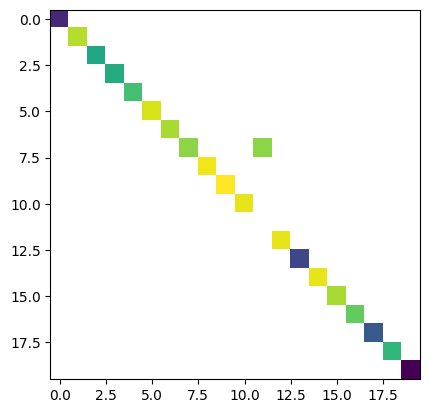

In [173]:
plt.imshow(z[:, order])